In [5]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

In [6]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'BRK-B', 'JNJ', 'V', 
    'NVDA', 'PG', 'UNH', 'HD', 'DIS', 'PYPL', 'MA', 'NFLX', 'INTC', 'VZ',
    'KO', 'PEP', 'MRK', 'BA', 'WMT', 'PFE', 'CSCO', 'ABT', 'CMCSA', 'ADBE', 'XOM'
]

In [41]:
data = yf.download(tickers, start="2014-01-01", end="2023-12-31")
# data.to_csv("data_2014_2023.csv")
# data = pd.read_csv("data_2014_2023.csv")
data

[*********************100%%**********************]  30 of 30 completed


Price        Adj Close                                                  \
Ticker            AAPL         ABT        ADBE        AMZN          BA   
Date                                                                     
2014-01-02   17.253256   31.049807   59.290001   19.898500  116.807945   
2014-01-03   16.874279   31.382799   59.160000   19.822001  117.619888   
2014-01-06   16.966288   31.797018   58.119999   19.681499  118.295067   
2014-01-07   16.844950   31.553354   58.970001   19.901501  120.089890   
2014-01-08   16.951632   31.837633   58.900002   20.096001  120.354858   
...                ...         ...         ...         ...         ...   
2023-12-22  192.868149  107.400551  598.750000  153.419998  260.440002   
2023-12-26  192.320221  107.597572  598.260010  153.410004  262.790009   
2023-12-27  192.419830  108.149193  596.080017  153.339996  262.100006   
2023-12-28  192.848206  108.750084  595.520020  153.380005  260.350006   
2023-12-29  191.802185  108.425011  596.599976  151.940002  260.660004   

Price                                                                ...  \
Ticker           BRK-B      CMCSA       CSCO        DIS       GOOGL  ...   
Date                                                                 ...   
2014-01-02  117.500000  20.608990  15.829063  69.643196   27.823923  ...   
2014-01-03  117.570000  20.456779  15.814678  69.497101   27.620953  ...   
2014-01-06  116.279999  20.436756  15.836260  69.232285   27.928907  ...   
2014-01-07  116.190002  21.161768  16.052114  69.707108   28.467329  ...   
2014-01-08  115.339996  21.129721  16.037725  68.684425   28.526569  ...   
...                ...        ...        ...        ...         ...  ...   
2023-12-22  356.470001  43.036057  48.881683  90.602005  141.327805  ...   
2023-12-26  356.829987  42.967590  49.067097  90.532326  141.357773  ...   
2023-12-27  356.950012  43.026276  49.223244  89.964943  140.209076  ...   
2023-12-28  357.570007  43.153427  49.262280  89.984856  140.069244  ...   
2023-12-29  356.660004  42.889343  49.301311  89.875359  139.529861  ...   

Price        Volume                                                      \
Ticker          PEP       PFE        PG        PYPL       TSLA      UNH   
Date                                                                      
2014-01-02  3275900  18366266   6981700         NaN   92826000  3067000   
2014-01-03  3287200  15847312   6925600         NaN   70425000  3206400   
2014-01-06  3888400  25255421   7208200         NaN   80416500  3424500   
2014-01-07  6332400  23423042   7158200         NaN   75511500  6542500   
2014-01-08  5653300  24161053  13458800         NaN   92448000  6172200   
...             ...       ...       ...         ...        ...      ...   
2023-12-22  3030100  35087200   4412800  13164000.0   93249800  1759500   
2023-12-26  2779200  30119100   3634900   9940600.0   86892400  1390800   
2023-12-27  3502500  35000700   4569400  11112300.0  106494400  1851800   
2023-12-28  2911100  30472900   5023000  11233400.0  113619900  2001000   
2023-12-29  3291500  30342500   5300900  16779000.0  100615300  2080100   

Price                                               
Ticker             V        VZ       WMT       XOM  
Date                                                
2014-01-02  10654000   9270200  20634000  11028100  
2014-01-03   7809600  12022200  14872200   9295600  
2014-01-06   8577600  16054800  21840600  11848500  
2014-01-07   8178000  17594600  15036900  11187000  
2014-01-08   8487200  13110700  17865600  11180400  
...              ...       ...       ...       ...  
2023-12-22   5111500  13157900  19405500  12921800  
2023-12-26   2085100  11856600  11679900  16835100  
2023-12-27   4034700  15267600  19896000  14558800  
2023-12-28   3020500  14931700  16776000  16329300  
2023-12-29   4074600  16205200  21948300  17741400  

[2516 rows x 180 columns]

In [8]:
shares_outstanding = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    info = stock.info
    shares = info.get('sharesOutstanding', None)  # Get shares outstanding
    shares_outstanding[ticker] = shares

print(shares_outstanding)

{'AAPL': 15204100096, 'MSFT': 7433039872, 'GOOGL': 5858999808, 'AMZN': 10495599616, 'TSLA': 3194639872, 'JPM': 2845159936, 'BRK-B': 1325190016, 'JNJ': 2407239936, 'V': 1670439936, 'NVDA': 24598300672, 'PG': 2354050048, 'UNH': 923417984, 'HD': 991614016, 'DIS': 1813590016, 'PYPL': 1022329984, 'MA': 916710976, 'NFLX': 429164992, 'INTC': 4276000000, 'VZ': 4209520128, 'KO': 4309870080, 'PEP': 1373570048, 'MRK': 2534810112, 'BA': 616222976, 'WMT': 8043539968, 'PFE': 5666699776, 'CSCO': 4028809984, 'ABT': 1739900032, 'CMCSA': 3863059968, 'ADBE': 443400000, 'XOM': 4442829824}


In [9]:
topics = {i[0] for i in data.columns}
print(f"The queried data retrieves information about the following topics for the tickers:\n{topics}")

The queried data retrieves information about the following topics for the tickers:
{'Low', 'Close', 'Volume', 'High', 'Adj Close', 'Open'}


In [10]:
topic = "Adj Close"

returns = data[topic].pct_change().apply(lambda x: np.log(x+1)).dropna()
returns_mean = returns.mean()
covariance_matrix = returns.cov()
returns.head()

Ticker,AAPL,ABT,ADBE,AMZN,BA,BRK-B,CMCSA,CSCO,DIS,GOOGL,...,PEP,PFE,PG,PYPL,TSLA,UNH,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,-0.002463,0.009404,0.001117,0.001558,0.018543,0.011259,0.006420,0.005130,0.012028,0.008050,...,0.020965,0.014333,0.020647,-0.002455,-0.043250,-0.012023,-0.005151,0.004454,0.017223,0.004112
2015-07-08,-0.025136,-0.019305,-0.007473,-0.016205,-0.008630,-0.011186,-0.013205,-0.013616,-0.016445,-0.015261,...,-0.008229,-0.008336,-0.008973,-0.053855,-0.049432,-0.016035,-0.015465,-0.002573,-0.009942,-0.010920
2015-07-09,-0.020607,-0.001219,0.005983,0.010855,0.006182,0.009813,0.005174,-0.002968,0.003553,0.005431,...,-0.010726,0.012183,-0.004083,-0.005780,0.011543,0.004704,0.004784,-0.006893,-0.003840,-0.004524
2015-07-10,0.026383,0.014932,0.001490,0.020778,0.011696,0.010648,0.018850,0.013656,0.007240,0.020823,...,0.010098,0.014659,0.003589,0.005492,0.004758,0.023273,0.020226,0.015870,0.004661,0.007570
2015-07-13,0.019122,0.000603,0.010492,0.026829,0.014703,0.011810,0.008352,0.018522,0.013732,0.027701,...,0.017327,0.013299,0.011789,0.058503,0.011548,0.002453,0.015949,0.004246,0.010340,0.002429


In [11]:
numero_carteiras = 10000
tabela_retornos_esperados = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras)
tabela_sharpe = np.zeros(numero_carteiras)
tabela_pesos = np.zeros((numero_carteiras, len(tickers)))

for k in range(numero_carteiras):
    
    pesos = np.random.random(len(tickers))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k, :] = pesos
    
    tabela_retornos_esperados[k] = np.sum(returns_mean * pesos * 252)
    tabela_volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(covariance_matrix*252, pesos)))
    
    tabela_sharpe[k] = tabela_retornos_esperados[k]/tabela_volatilidades_esperadas[k]

In [12]:
indice_do_sharpe_maximo = tabela_sharpe.argmax()
tabela_pesos[indice_do_sharpe_maximo]

array([2.46127378e-02, 1.43260622e-02, 5.17046106e-02, 6.76216681e-02,
       3.91114243e-03, 1.01193449e-02, 2.62035729e-02, 2.76760985e-02,
       3.74303373e-03, 5.26768821e-02, 2.20724490e-02, 8.61296927e-05,
       5.75818099e-02, 5.12369641e-02, 6.39077630e-02, 2.31083050e-02,
       4.22363204e-02, 6.80325998e-02, 4.45516226e-02, 6.52230722e-02,
       8.85080514e-04, 3.88367897e-02, 4.94553334e-02, 6.64604461e-03,
       4.56983986e-02, 3.72933017e-02, 1.00450120e-02, 2.74391173e-02,
       5.60521522e-02, 7.01658077e-03])

In [13]:
tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1

In [14]:
from scipy.optimize import minimize


eixo_y_fronteira_eficiente = np.linspace(
    tabela_retornos_esperados_arit.min(), 
    tabela_retornos_esperados_arit.max(), 50
)

def pegando_retorno(peso_teste):
    peso_teste = np.array(peso_teste)
    retorno = np.sum(returns_mean * peso_teste) * 252
    retorno = np.exp(retorno) - 1

    return retorno

def checando_soma_pesos(peso_teste):

    return np.sum(peso_teste)-1

def pegando_vol(peso_teste):
    peso_teste = np.array(peso_teste)
    vol = np.sqrt(np.dot(peso_teste.T, np.dot(covariance_matrix*252, peso_teste)))
    
    return vol

peso_inicial = [1/len(tickers)] * len(tickers) 
limites = tuple([(0, 1) for ativo in tickers])

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:
    
    #vamos pegar a melhor volatilidade para cada retorno possível
    
    restricoes = ({'type':'eq', 'fun':checando_soma_pesos},
            {'type':'eq', 'fun': lambda w: pegando_retorno(w) - retorno_possivel})
    
    result = minimize(pegando_vol,peso_inicial,method='SLSQP', bounds=limites, 
                      constraints=restricoes)
    eixo_x_fronteira_eficiente.append(result['fun'])
    

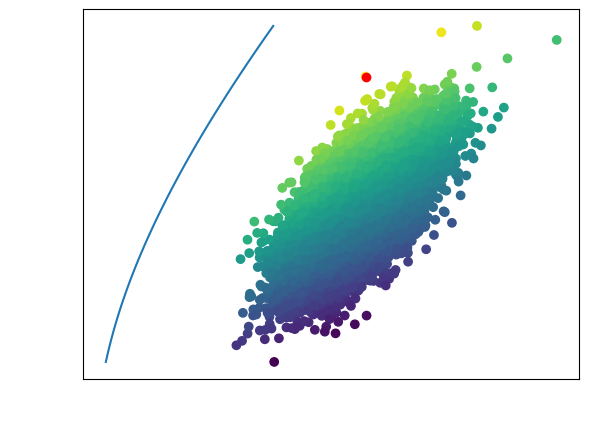

In [15]:
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c = tabela_sharpe)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo], 
            tabela_retornos_esperados_arit[indice_do_sharpe_maximo], c = "red")
ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

### Equally Weighted Portfolio

In [16]:
# Calculate the equally weighted portfolio returns
equal_weights = [1/len(tickers)] * len(tickers)
equal_weighted_returns = returns.dot(equal_weights)

# Create a DataFrame to store the equally weighted portfolio returns
equal_weighted_portfolio = pd.DataFrame(equal_weighted_returns, columns=['Equally Weighted Portfolio'])
equal_weighted_portfolio


,Equally Weighted Portfolio
Date,
2015-07-07,0.003054
2015-07-08,-0.014639
2015-07-09,0.001522
2015-07-10,0.012640
2015-07-13,0.014600
...,...
2023-12-22,0.001301
2023-12-26,0.004530
2023-12-27,0.001517


In [17]:
weights_dict = {ticker: 1 for ticker in tickers}

# Convert weights dictionary to a list of weights for calculation
weights = [weights_dict[ticker] for ticker in tickers]

# Calculate the equally weighted portfolio returns
equal_weighted_returns = returns.dot(weights)

# Create a DataFrame to store the equally weighted portfolio returns
equal_weighted_portfolio = pd.DataFrame(equal_weighted_returns, columns=['Equally Weighted Portfolio'])

# Display the first few rows
equal_weighted_portfolio.head()

,Equally Weighted Portfolio
Date,
2015-07-07,0.091609
2015-07-08,-0.439181
2015-07-09,0.045672
2015-07-10,0.379190
2015-07-13,0.438006


###  Value-Weighted Portfolio
A value-weighted portfolio assigns weights based on the market capitalization of each company. Here, we'll use the stock prices as a proxy for market capitalization. For a more accurate calculation, you would use the actual market cap data.

Calculate Market Capitalization:

Download the number of shares outstanding for each company.
Multiply by the price to get market capitalization.
Assign Weights Based on Market Cap:

For simplicity, we’ll assume the prices at the start date as proxies for market cap weights.

In [19]:
# Use the prices on the last available date as proxies for market cap
initial_prices = data[topic].iloc[-1]

# Calculate weights as a proportion of the total market cap
market_caps = {ticker:initial_prices[ticker] * shares_outstanding[ticker] for ticker in tickers}
total_market_cap = sum(market_caps.values())
value_weights = {ticker:market_caps[ticker] / total_market_cap for ticker in tickers}

# Calculate the value-weighted portfolio returns
value_weights_series = pd.Series(value_weights)
value_weighted_returns = returns.dot(value_weights_series)

# value_weighted_returns = returns.dot(value_weights)

# Create a DataFrame to store the value-weighted portfolio returns
value_weighted_portfolio = pd.DataFrame(value_weighted_returns, columns=['Value Weighted Portfolio'])

In [36]:
sorted_keys_desc = sorted(value_weights, key=lambda k: value_weights[k], reverse=True)
print(sorted_keys_desc)

['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'TSLA', 'UNH', 'JPM', 'BRK-B', 'XOM', 'V', 'WMT', 'MA', 'JNJ', 'HD', 'PG', 'MRK', 'ADBE', 'KO', 'PEP', 'INTC', 'NFLX', 'CSCO', 'ABT', 'CMCSA', 'DIS', 'BA', 'PFE', 'VZ', 'PYPL']


In [42]:
# Flatten the columns to remove the multi-level structure
# Assuming the 'Adj Close' level contains the data you need
# Assuming you want the 'Adj Close' prices for each ticker
data = data['Adj Close']
# data.columns = data.columns.get_level_values(1)


# print(set(value_weights.keys()) - set(data.columns))  # Tickers in value_weights not in data
# print(set(data.columns) - set(value_weights.keys()))  # Tickers in data not in value_weights


IndexError: Too many levels: Index has only 1 level, not 2

In [45]:
print(len(data.columns))

30


In [54]:
def rebalance_portfolios(data, value_weights, equal_weights):
    monthly_rebalance_dates = data.resample('M').last().index + pd.DateOffset(days=1)
    monthly_rebalance_dates = monthly_rebalance_dates[monthly_rebalance_dates <= data.index[-1]]
    
    value_weighted_portfolio = pd.DataFrame(index=data.index, columns=data.columns)
    equal_weighted_portfolio = pd.DataFrame(index=data.index, columns=data.columns)
    
    for date in monthly_rebalance_dates:
        if date not in data.index:
            date = data.index[data.index.searchsorted(date)]
        
        value_weights_series = pd.Series(value_weights, index=data.columns)
        
        # Ensure the series aligns with the data columns
        total_value = (data.loc[date, :] * value_weights_series).sum()
        value_weights_series = (data.loc[date, :] * value_weights_series) / total_value
        
        # Expand value_weights_series to match the shape of the DataFrame slice
        num_rows_to_assign = len(value_weighted_portfolio.loc[date:])
        value_weights_expanded = pd.DataFrame(
            np.tile(value_weights_series.values, (num_rows_to_assign, 1)),
            index=value_weighted_portfolio.loc[date:].index,
            columns=value_weighted_portfolio.columns
        )
        
        value_weighted_portfolio.loc[date:] = value_weights_expanded
        
        equal_weights_series = pd.Series(equal_weights, index=data.columns)
        equal_weights_expanded = pd.DataFrame(
            np.tile(equal_weights_series.values, (num_rows_to_assign, 1)),
            index=equal_weighted_portfolio.loc[date:].index,
            columns=equal_weighted_portfolio.columns
        )
        
        equal_weighted_portfolio.loc[date:] = equal_weights_expanded
    
    return value_weighted_portfolio, equal_weighted_portfolio



In [55]:
print(value_weights_series.shape)
print(data.shape)


(30,)
(2516, 30)


In [56]:
value_weighted_portfolio, equal_weighted_portfolio = rebalance_portfolios(data, value_weights, equal_weights)

In [57]:
def calculate_turnover(portfolio, data):
    turnover = portfolio.diff().abs().sum(axis=1) / data.sum(axis=1)
    return turnover

value_weighted_turnover = calculate_turnover(value_weighted_portfolio, data)
equal_weighted_turnover = calculate_turnover(equal_weighted_portfolio, data)

# Which portfolio has the highest turnover?
if value_weighted_turnover.sum() > equal_weighted_turnover.sum():
    print("Value-weighted portfolio has the highest turnover.")
else:
    print("Equal-weighted portfolio has the highest turnover.")


Value-weighted portfolio has the highest turnover.


In [58]:
# Calculate annualized returns, standard deviation, Sharpe ratio, and Information Ratio
def compute_statistics(returns, risk_free_rate=0.01):
    annualized_return = returns.mean() * 252
    annualized_std_dev = returns.std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev
    
    return annualized_return, annualized_std_dev, sharpe_ratio

# Compute daily portfolio returns
value_weighted_portfolio_returns = (value_weighted_portfolio * returns).sum(axis=1)
equal_weighted_portfolio_returns = (equal_weighted_portfolio * returns).sum(axis=1)

value_weighted_stats = compute_statistics(value_weighted_portfolio_returns)
equal_weighted_stats = compute_statistics(equal_weighted_portfolio_returns)

# Information Ratio vs S&P500
sp500_returns = yf.download('^GSPC', start="2014-01-01", end="2023-12-31")['Adj Close'].pct_change().dropna()
info_ratio_value = (value_weighted_stats[0] - sp500_returns.mean() * 252) / (value_weighted_stats[1] - sp500_returns.std() * np.sqrt(252))
info_ratio_equal = (equal_weighted_stats[0] - sp500_returns.mean() * 252) / (equal_weighted_stats[1] - sp500_returns.std() * np.sqrt(252))

print(f"Value-Weighted Portfolio - Annualized Return: {value_weighted_stats[0]}, Sharpe Ratio: {value_weighted_stats[2]}, Information Ratio: {info_ratio_value}")
print(f"Equal-Weighted Portfolio - Annualized Return: {equal_weighted_stats[0]}, Sharpe Ratio: {equal_weighted_stats[2]}, Information Ratio: {info_ratio_equal}")


[*********************100%%**********************]  1 of 1 completed

Value-Weighted Portfolio - Annualized Return: 0.14906594456594474, Sharpe Ratio: 0.6947132415093652, Information Ratio: 1.6390676127564783
Equal-Weighted Portfolio - Annualized Return: 0.12263663990768782, Sharpe Ratio: 0.6460236069739292, Information Ratio: -3.616792596188679


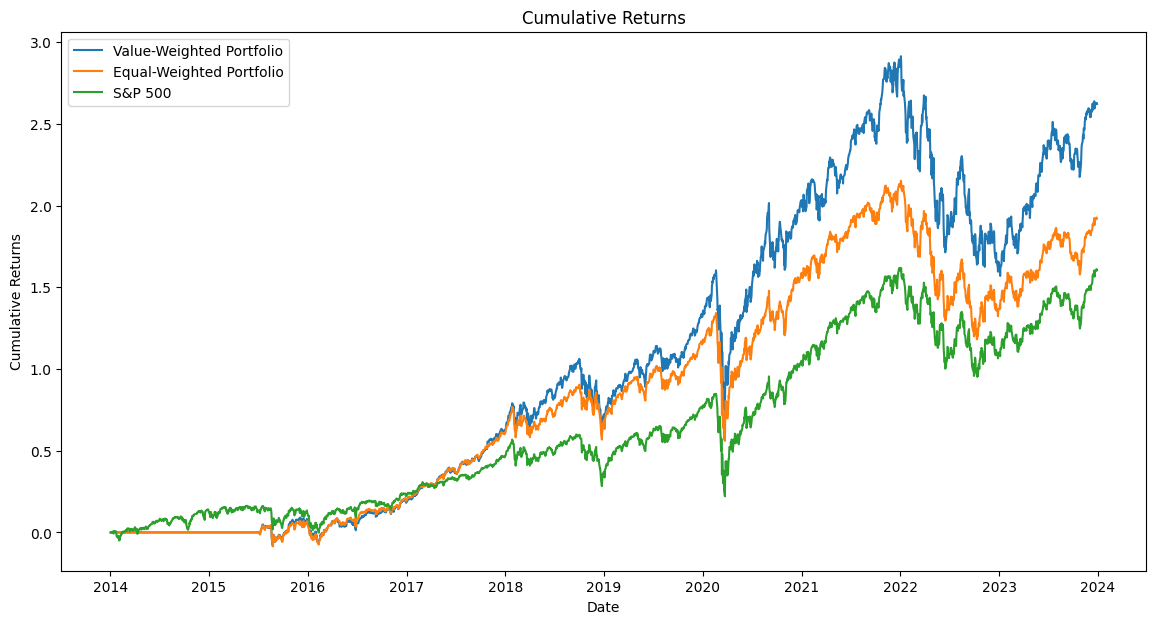

In [59]:
# Calculate cumulative returns
def cumulative_returns(returns):
    cumulative = (1 + returns).cumprod() - 1
    return cumulative

value_weighted_cumulative = cumulative_returns(value_weighted_portfolio_returns)
equal_weighted_cumulative = cumulative_returns(equal_weighted_portfolio_returns)
sp500_cumulative = cumulative_returns(sp500_returns)

plt.figure(figsize=(14, 7))
plt.plot(value_weighted_cumulative, label='Value-Weighted Portfolio')
plt.plot(equal_weighted_cumulative, label='Equal-Weighted Portfolio')
plt.plot(sp500_cumulative, label='S&P 500')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
